## Tutorial: Input file formats for Gecos_Rdkit

This tutorial shows how to check if the input file to generate the conformer set is correctly conformed.

### PET
    1.PDB from Materials Studio(MS).
    2.MOL2 from Materials Studio.
    3.MOL2 from openbabel using as input the MOL2 from MS.

Be careful with the Atom name field assigned by MS.You may make changes by hand in these fields to work correctly.

The first step is to import the library ``gecos``. After that, you may define the path to the input files.

In [1]:
import gecos
pdbfile_ms="/home/jramos/PycharmProjects/GeCos/data/PET.pdb"


Next step is to create the GecosRdkit objects for each file. Take care of the warning raises by the second object.
This means that the file ``m̀ol2file_ms`` is not correctly conformed.

In [2]:
g1_pdb_ms = gecos.GecosRdkit(filename=pdbfile_ms, bond_perception=True, logger=None)



        ***********************************************************************
                           Generation of Conformers (GeCoS)
                         -----------------------------------
                         
                                    Version 0.1
                         
                                  Dr. Javier Ramos
                          Macromolecular Physics Department
                    Instituto de Estructura de la Materia (IEM-CSIC)
                                   Madrid (Spain)
                                   
                GeCoS is an open-source python library to quickly generate
                conformers of small molecules or polymer segments 
                using RdKit and OpenBabel libraries. Once, the
                conformers are generated, QM optimizations and subsequent 
                clustering can be done.
                
                This software is distributed under the terms of the
                GNU General

Visualize the molecules:

In [8]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
m1 = g1_pdb_ms.mol_rdkit
Draw.ShowMol(m1)

Note the warning when the bond perception is not used in a PDB file. This is due to in PDB files, information for
bond orders are not available. As you can see, below the representation of this molecule is not correct.
On the other hand, in the case of ``MOL2`` and ``SDF`` formats, as the bond information is available in the files,
the ``bond_perception flag`` should be ``False``

In [5]:
g1_pdb_ms = gecos.GecosRdkit(filename=pdbfile_ms, bond_perception=True, logger=None)
g1_pdb_ms_nobp = gecos.GecosRdkit(filename=pdbfile_ms, bond_perception=False, logger=None)
g1_mol2_ms_nobp = gecos.GecosRdkit(filename=mol2file_ms, bond_perception=False, logger=None)

	Bond_perception is FALSE for PDB file
		PDB file does not contain info for bond orders.



Create a ``sdf`` file from ``pdb``

In [6]:
import utils
utils.pdbtosdf(pdbfile_ms)
sdffile_ms="/home/jramos/PycharmProjects/GeCos/data/nitrobenzene_ms_frompdb.sdf"
g1_sdf_ms = gecos.GecosRdkit(filename=sdffile_ms, bond_perception=False, logger=None)

Draw 2D structures

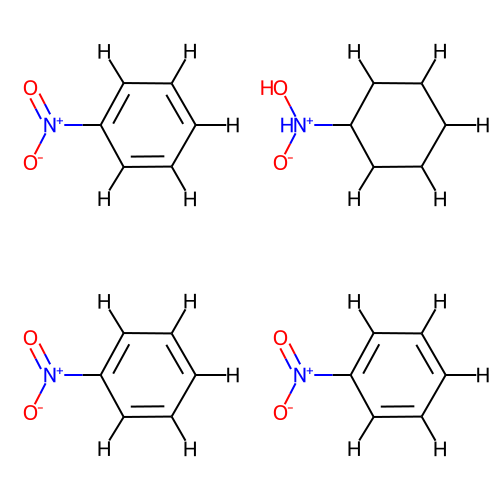

In [7]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
m1 = g1_pdb_ms.mol_rdkit
m2 = g1_pdb_ms_nobp.mol_rdkit
m3 = g1_mol2_ms_nobp.mol_rdkit
m4 = g1_sdf_ms.mol_rdkit
Draw.MolsToGridImage((m1, m2, m3, m4), subImgSize=(250,250), molsPerRow=2)

The PDB structure without ``bond_perception`` is not correct.